In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
import random
import subprocess as sp
import os
import pickle
import time
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, mark_inset, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
model = load_model('saved_models/best_model2.h5')
# with open('mesh_rfr_classifier.pkl', 'rb') as f:
#     rfc = pickle.load(f)
train_stats = pd.read_pickle('saved_models/mode2_stat.pkl')
# tr_stats_rfc = pd.read_pickle('rforest_clss_stats.pkl')

In [3]:
def norm(x,stat):
    return (x - stat['mean']) / (stat['std']+0.0000001)


def log_norm(x):
    for col in x.columns:
        x.iloc[:,col] = (x.iloc[:,col] - x.iloc[:,col].min()+1).transform(np.log10)
    return x

In [4]:
# verifying the model with trained data
X_train = pd.read_csv('dataset/updated_model_dataset/Final_dataset/rand_app_final.csv',header=None,error_bad_lines=False)
Y_train = X_train.iloc[:,-1]
X_train.drop(X_train.columns[-1],inplace=True,axis=1)

X_train.drop(X_train.columns[-1],inplace=True,axis=1)
# X_train.drop(X_train.columns[-1],inplace=True,axis=1)
X_train.drop(X_train.columns[0],inplace=True,axis=1)
X = norm(X_train,train_stats)
X.drop(X.columns[-1],inplace=True,axis=1)

In [5]:
# X_train = pd.read_csv('dataset/updated_model_dataset/Final_dataset/rand_app_final.csv',header=None,error_bad_lines=False)

In [6]:
X

,1,2,3,4,5,6,7,8,9,10,...,554,555,556,557,558,559,560,561,562,563
0,-1.428098,0.0,0.0,0.0,-1.274454,-0.774048,-0.635411,0.0,0.0,-1.113490,...,-0.076708,-0.046227,0.0,0.001224,-0.574302,0.003962,-0.032679,0.0,0.0,-0.576062
1,-1.512978,0.0,0.0,0.0,-1.117908,-0.970967,-0.770216,0.0,0.0,-1.220147,...,-0.076574,-0.046170,0.0,0.001224,-0.574864,0.003962,-0.033162,0.0,0.0,-0.577898
2,-1.512978,0.0,0.0,0.0,-1.232929,-0.952094,-0.770216,0.0,0.0,-1.281094,...,-0.076708,-0.046236,0.0,0.001224,-0.574772,0.003962,-0.033162,0.0,0.0,-0.575920
3,-1.258338,0.0,0.0,0.0,-1.274454,-0.970967,-0.610064,0.0,0.0,-1.081977,...,-0.073269,-0.044951,0.0,0.001224,-0.574864,0.003962,-0.031793,0.0,0.0,-0.577898
4,-1.428098,0.0,0.0,0.0,-1.095307,-0.834869,-0.770216,0.0,0.0,-1.220098,...,-0.076021,-0.046116,0.0,0.001224,-0.574864,0.003962,-0.033162,0.0,0.0,-0.573648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293931,0.863661,0.0,0.0,0.0,0.559561,0.244565,0.895109,0.0,0.0,0.886273,...,-0.035456,0.056342,0.0,0.001229,1.014177,0.003962,0.004010,0.0,0.0,-0.075976
293932,0.863661,0.0,0.0,0.0,0.745804,-0.970967,-0.062532,0.0,0.0,0.494777,...,0.042325,0.027258,0.0,0.001224,1.004828,0.003962,-0.033162,0.0,0.0,-0.543076
293933,0.863661,0.0,0.0,0.0,0.211384,-0.970967,2.732500,0.0,0.0,0.732912,...,0.073025,0.042427,0.0,0.001225,-0.574864,0.003963,0.065484,0.0,0.0,-0.229255
293934,0.863661,0.0,0.0,0.0,0.927993,0.240567,3.086334,0.0,0.0,0.732912,...,0.120798,0.003081,0.0,0.001230,-0.574864,0.003962,0.023522,0.0,0.0,-0.373907


In [7]:
st_time = time.time()
Y_pred = model.predict(X[0:10000]).flatten()
# Y_train=np.expand_dims(Y_train, axis=1)
end_time = time.time()
# train_MSE = np.sum(np.square(Y_pred-Y_train))/Y_train.shape[0]
# print('train MSE = %f'%(train_MSE))
print('prediction time=%f'%(end_time-st_time))
#plot histogram
train_error = Y_pred-Y_train[0:10000]
print(f'training error:{train_error}')
# plt.hist(train_error, bins =25,alpha=0.7, rwidth=0.85)
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel("Prediction Error")
# plt.ylabel("Count")
# plt.title('train_data_hist')
# plt.savefig('train_histr.jpg')

ValueError: in user code:

    File "/home/ram_lak/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/home/ram_lak/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ram_lak/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/home/ram_lak/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/home/ram_lak/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ram_lak/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 565), found shape=(None, 563)


In [69]:
Y_pred


array([30.236366, 30.774559, 30.998417, ..., 34.490505, 35.04508 ,
       34.33104 ], dtype=float32)

In [85]:
k10 = 0;
kn10 = 0;
for i in train_error:
    if(i > 5):
        k10 += 1
    elif(i < -5):
        kn10 += 1
print('error val greater than 5:',k10)
print('error val less than -5:',kn10)

error val greater than 5: 0
error val less than -5: 0


In [74]:
def mapp_syntraff(traffic_type,seed):
    random.seed(seed)
    mapp_vec = random.sample(range(1,17),16)
    print('mapping vec',mapp_vec)
    inject_rate = 0.001
       
    file2 = open("latency_model_2010_pso/files/vopd_mapp.txt","w")
    file1 = open('booksim/examples/vopd_mapp.txt','w')
    for i in range(110):
        file2.write('%d\t %s \t %f\n'%(i,str(mapp_vec),inject_rate))
        file1.write('%d\t %s \t %f\n'%(i,str(mapp_vec),inject_rate))
        inject_rate += 0.0015
    file2.close()
    file1.close()
    
    
    # ************* begin modify file  files/config.txt for diff syn traffic pattern *************#
    with open('latency_model_2010_pso/files/config.txt', 'r') as file:
        # read a list of lines into data
        data = file.readlines()


    # now change the 2nd line, note that you have to add a newline
    data[3] = 'traffic file#\tfiles/'+traffic_type+'\n'

    # and write everything back
    with open('latency_model_2010_pso/files/config.txt', 'w') as file:
        file.writelines( data )
    #************** end modifying the file **************************************************#
    open('latency_model_2010_pso/files/vopd_mapp_features.txt','w').close()
    os.chdir('/home/ram_lak/Ramesh_work/Final_work/mesh4x4_training/latency_model_2010_pso')
    os.system('./latency_mode_2010_updated')
    os.chdir('/home/ram_lak/Ramesh_work/Final_work/mesh4x4_training/')

    with open('latency_model_2010_pso/files/vopd_mapp_features.txt','r') as my_file:
        text = my_file.read()
        text = text.replace("    ", " ")
        text = text.replace("[", " ")
        text = text.replace("]", " ")
        text = text.replace(" ",",")
        text = text.replace(",,,",",")
        text = text.replace(",,",",")
        text = text.replace(",,",",")
        text = text.replace(",\n,\n,\n,",'\n')
        text = text.replace('\n,',',')
    my_file.close()
    
    open('latency_model_2010_pso/files/vopd_mapp_features.csv', 'w').close()
    with open('latency_model_2010_pso/files/vopd_mapp_features.csv','w') as analy_file:
        analy_file.write(text)


    # Latency evaluation using booksim simulator
    os.chdir('/home/ram_lak/Ramesh_work/Final_work/mesh4x4_training/booksim/')
#     print(os.getcwd())
        # ************* begin modify file  files/config.txt for diff syn traffic pattern *************#
    with open('examples/anynet_config', 'r') as file:
        # read a list of lines into data
        trff = file.readlines()


    # now change the 2nd line, note that you have to add a newline
    trff[73] = 'traffic_file = examples/'+traffic_type+';\n'

    # and write everything back
    with open('examples/anynet_config', 'w') as file:
        file.writelines(trff)
    #************** end modifying the file **************************************************#
    
    open('examples/vopd_mapp_out.txt', 'w').close()
    sp.call('./pgm_within_pgm',shell=True)

    with open('examples/vopd_mapp_out.txt','r') as my_file:
        text = my_file.read()
        text = text.replace(" \t ", ",")
        text = text.replace("\t\t", ",")
        text = text.replace("\t", ",")
        text = text.replace("[", "")
        text = text.replace("]", " ")
        text = text.replace(" ","")
    my_file.close()
    open('/home/ram_lak/Ramesh_work/Final_work/mesh4x4_training/booksim_out.csv', 'w').close()
    with open('/home/ram_lak/Ramesh_work/Final_work/mesh4x4_training/booksim_out.csv','w') as myfile:
        myfile.write(text)
    my_file.close()
#     print(os.getcwd())
    os.chdir('/home/ram_lak/Ramesh_work/Final_work/mesh4x4_training')
#     print(os.getcwd())

    X = pd.read_csv("latency_model_2010_pso/files/vopd_mapp_features.csv",header=None,
                          error_bad_lines=False)
    book_lat = pd.read_csv('booksim_out.csv',header=None,
                          error_bad_lines=False)    #book_lat.iloc[:,18][0:100]
    X.drop(X.columns[-1],inplace=True,axis=1)
    anay_lat = X.iloc[:,-1]
#     X.drop(X.columns[-1],inplace=True,axis=1)
    
    X.drop(X.columns[0],inplace=True,axis=1)    
    X_norm = norm(X,train_stats)

#     X_class = norm(X,tr_stats_rfc)
    
    Y = model.predict(X_norm).flatten()
#     Y_class = rfc.predict(X_class)
#     Y_mod = np.full(len(Y),250.00)
    
    Y_DNNP = np.full(len(Y),250.00)
    for pos in range(len(Y)):
        if (Y[pos] > 80):
            break
        else:
            Y_DNNP[pos] = Y[pos]
            
#     for pos in range(len(Y)):
#         if (Y_class[pos] == 1):
#             Y_mod[pos] = 250.00
#             break
#         else:
#             Y_mod[pos] = Y_DNNP[pos]
    return X,anay_lat,Y_DNNP,book_lat #,Y_mod,Y_class

In [12]:
# os.chdir('/home/ram_lak/Ramesh_work/Final_work/mesh4x4_training/')
# rows, cols = 3, 2
# # fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',figsize=(20,10))
# fig1, ax = plt.subplots(rows, cols,figsize=(20,10),dpi=600)

# # trff_files = ['traffic_bitcomplement_16.txt','traffic_bitreverse_16.txt',
# #               'traffic_neighbor_16.txt','traffic_uniform_16.txt','traffic_tornado_16.txt',
# #               'traffic_transpose_16.txt']#,'traffic_uniform_16.txt','traffic_shuffle_16.txt','traffic_vopd.txt']
# trff_files = ['traffic_vopd.txt','traffic_mpeg4.txt','traffic_h264.txt','traffic_tg_16node_1.txt',
#                    'traffic_tg_16node_2.txt','traffic_tg_16node_3.txt']
# pos = 0;
# for row in range(rows):
#     for col in range(cols):
#         X,anay_lat,Y,book_lat= mapp_syntraff(trff_files[pos])
#         ax[row, col].plot(X.iloc[:,0][0:100],anay_lat[0:100],'-x',label='Analy_model')
#         ax[row, col].plot(X.iloc[:,0][0:100],Y[0:100],'-*', label = 'DNN_model')
# #         ax[row, col].plot(X.iloc[:,0][0:100],Y_new[0:100],'-', label = 'DNN_model&RFC')
#         ax[row, col].plot(book_lat.iloc[:,17][0:100],book_lat.iloc[:,18][0:100],'-',label = 'Booksim2.0')
#         ax[row, col].set(xlabel='Injection rate (flit/cycle/node)', ylabel='Packet latency(cycles)', title=trff_files[pos][0:-4])
#         ax[row,col].set_xlim([0,0.04])
#         ax[row,col].set_ylim([0,200])
#         ax[row,col].legend(loc='upper right')
#         print('%d:traffic %s is completed'%(pos,trff_files[pos]))
#         pos += 1
# fig1.tight_layout(pad=2.0)
# plt.show()  


# trff_files = ['traffic_bitcomplement_16.txt','traffic_bitreverse_16.txt',
# #               'traffic_neighbor_16.txt','traffic_uniform_16.txt','traffic_tornado_16.txt',
# #               'traffic_transpose_16.txt']#,'traffic_uniform_16.txt','traffic_shuffle_16.txt','traffic_vopd.txt']
# trff_files = ['traffic_vopd.txt','traffic_mpeg4.txt','traffic_h264.txt','traffic_tg_16node_1.txt',
#                    'traffic_tg_16node_2.txt','traffic_tg_16node_3.txt']

In [79]:
os.chdir('/home/ram_lak/Ramesh_work/Final_work/mesh4x4_training')
X,anay_lat,Y,book_lat = mapp_syntraff('traffic_tg_16node_3.txt',2)

mapping vec [2, 16, 15, 6, 3, 11, 5, 10, 4, 9, 1, 7, 14, 8, 12, 13]


b'Skipping line 24: expected 22 fields, saw 1567\n'


(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7f4e142a99a0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7f4e142a9f40>)

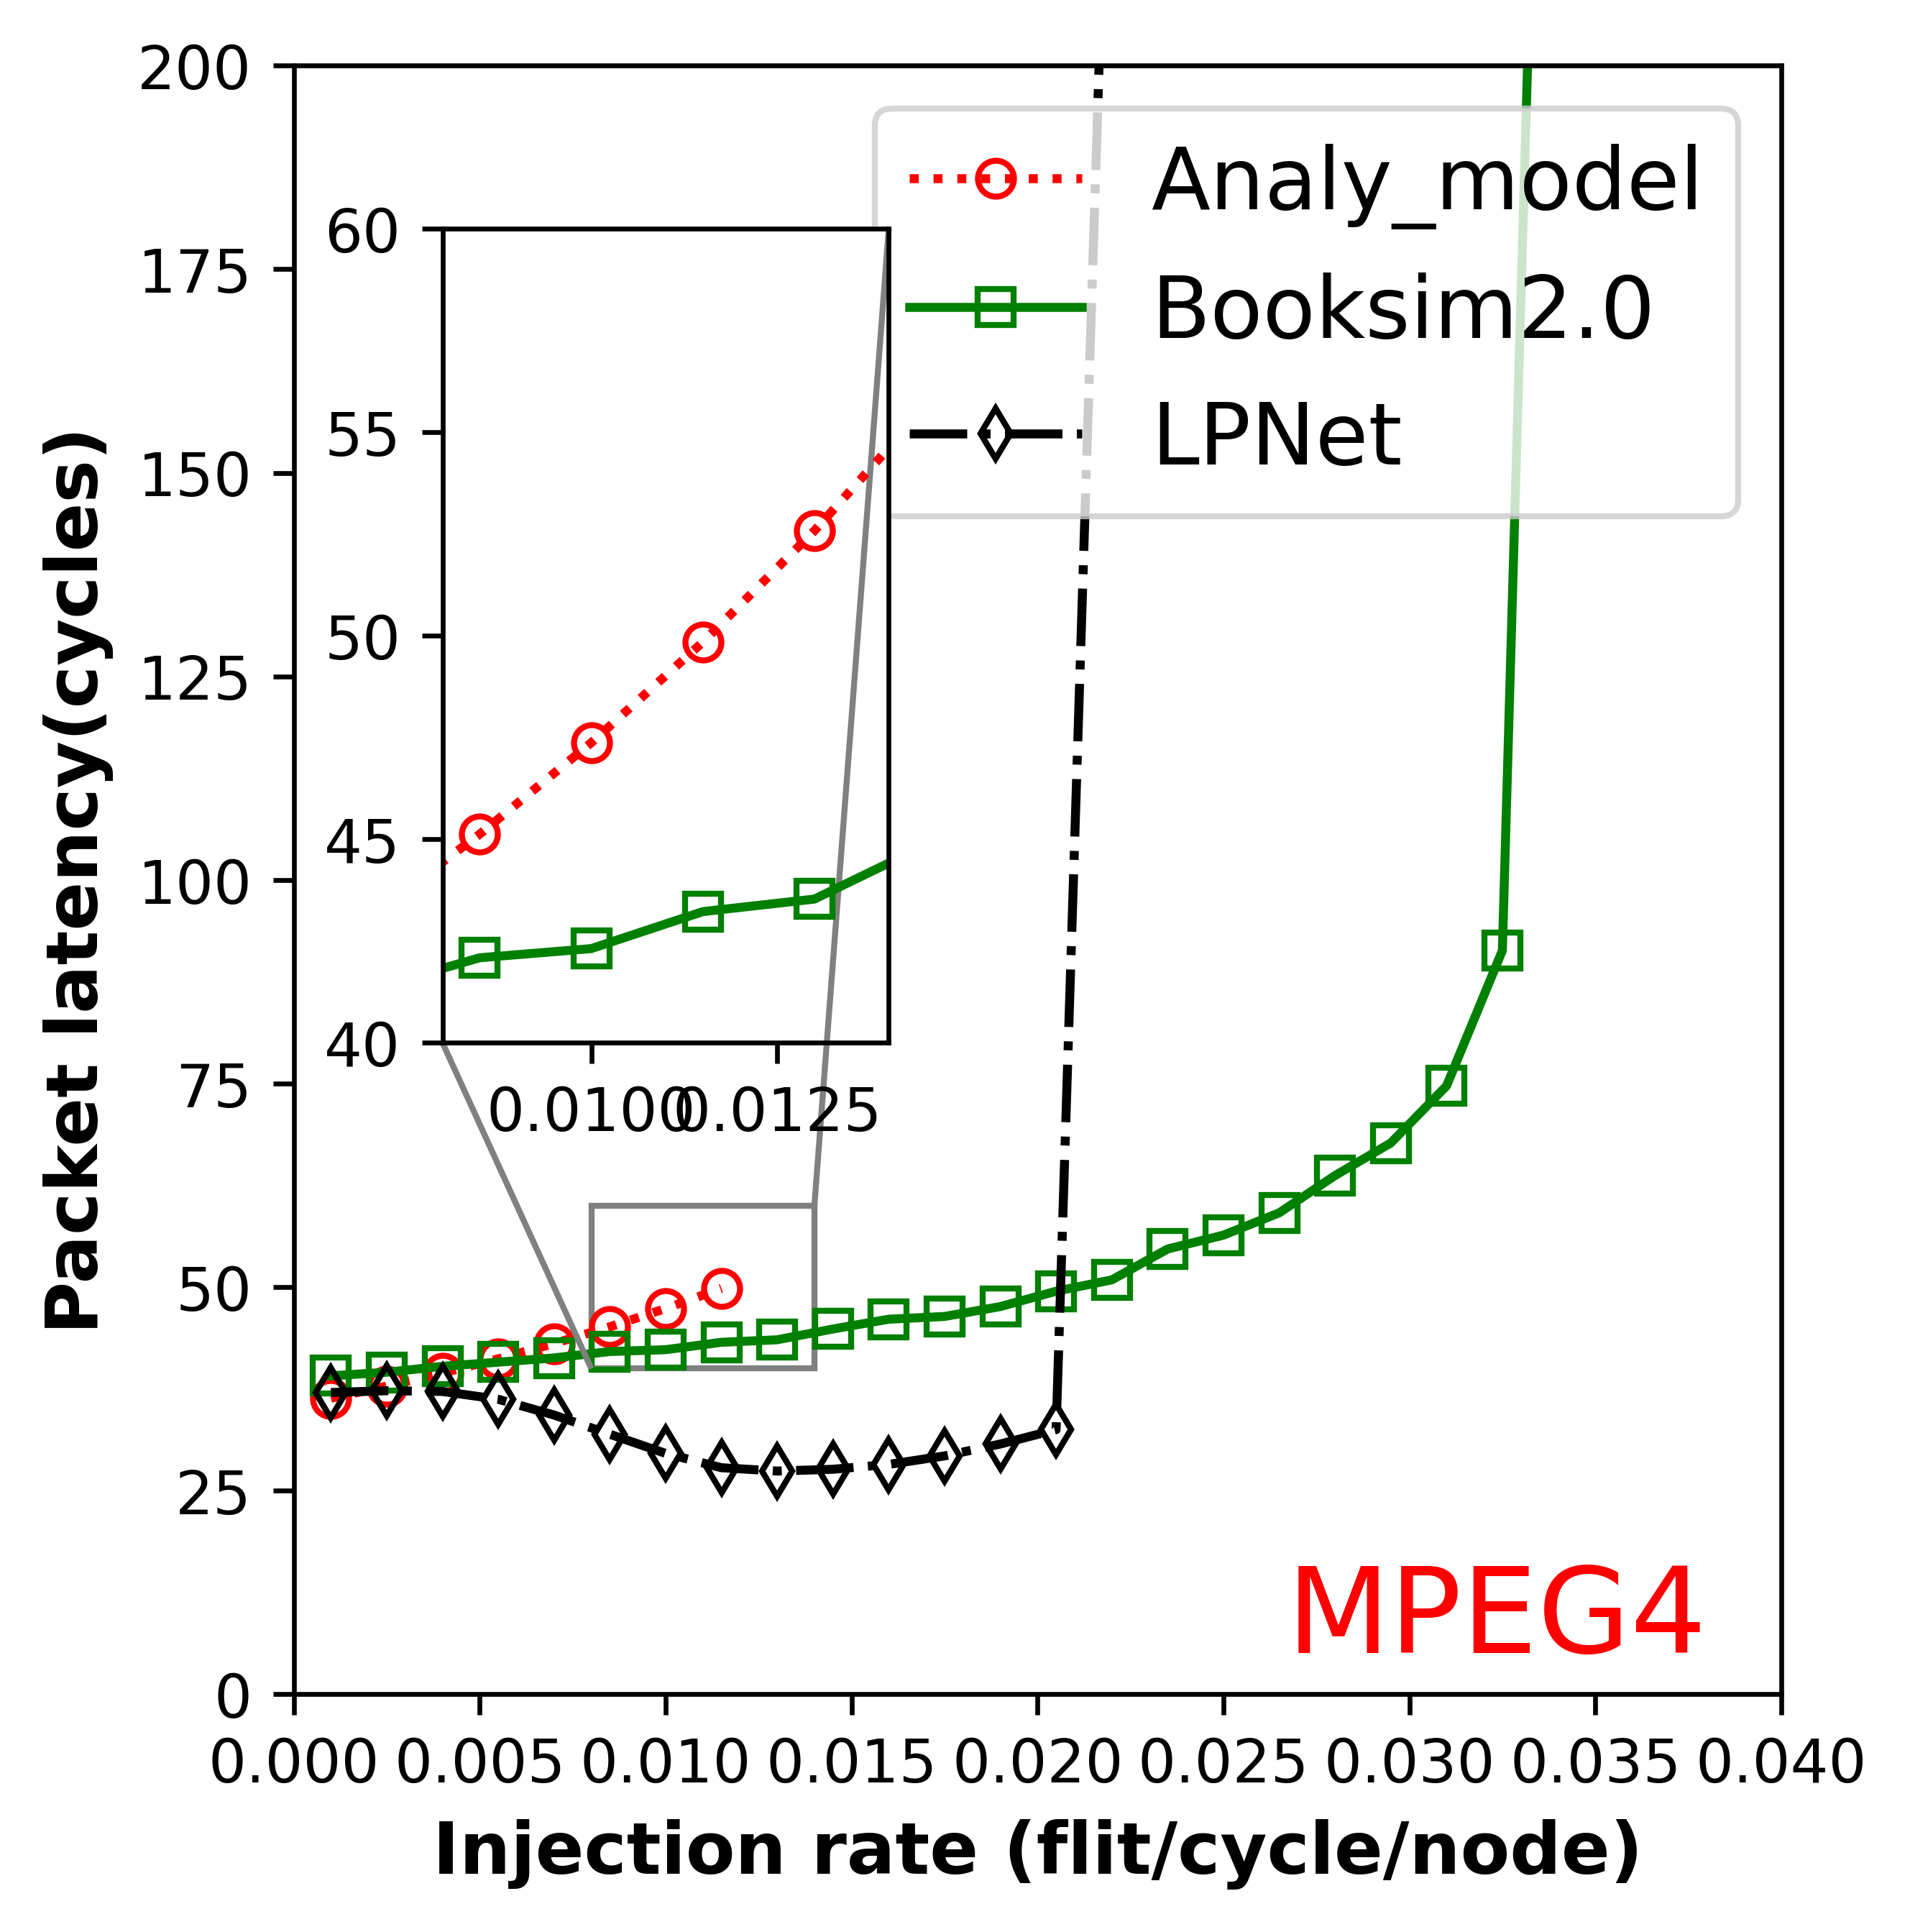

In [80]:
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_name('Times New Roman')
marker_style1 = dict(color='r', linestyle=':', marker='o',
                    markersize=6, markerfacecoloralt='tab:red')

marker_style2 = dict(color='k', linestyle='-.', marker='d',
                    markersize=6, markerfacecoloralt='tab:red') 


marker_style3 = dict(color='g', linestyle='-', marker='s',
                    markersize=6, markerfacecoloralt='tab:red') 

    
fig, ax = plt.subplots(figsize=(4.45,5),dpi=600)
ax.plot(X.iloc[:,0][0:8],anay_lat[0:8],fillstyle='none',**marker_style1,label='Analy_model')

# ax.plot(X.iloc[:,0][0:100],Y_new[0:100],'-.', label = 'DNN_model&RFC')
ax.plot(book_lat.iloc[:,17][0:100],book_lat.iloc[:,18][0:100],fillstyle='none',**marker_style3,label = 'Booksim2.0')
ax.plot(X.iloc[:,0][0:29],Y[0:29],fillstyle='none',**marker_style2, label = 'LPNet')
plt.xlabel('Injection rate (flit/cycle/node)',fontsize=12,fontweight='bold')
plt.ylabel('Packet latency(cycles)',fontsize=12,fontweight='bold')
ax.text(0.95, 0.01, 'MPEG4',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='red', fontsize=20)
# plt.title('sat comparision')
# ax.set_rasterized(True)
ax.set_xlim([0,0.040])
ax.set_ylim([0,200])
plt.legend(loc='upper right',fontsize='x-large')

# axins = zoomed_inset_axes(ax, 3, loc=9) 
axins = fig.add_axes([0,0,1,1], zorder=10, frameon=True)
axins.set_axes_locator(InsetPosition(ax, [0.1, 0.4, 0.3, 0.5]))

axins.plot(X.iloc[:,0][0:86],anay_lat[0:86],fillstyle='none',**marker_style1)
axins.plot(X.iloc[:,0][0:90],Y[0:90],fillstyle='none',**marker_style2)
# axins.plot(X.iloc[:,0][0:90],Y_new[0:90],'-.')
axins.plot(book_lat.iloc[:,17][0:86],book_lat.iloc[:,18][0:86],fillstyle='none',**marker_style3)

x1, x2, y1, y2 = 0.008, 0.014, 40, 60
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=True)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0.5")


In [ ]:
# fig.savefig('Final_plots_for_pub/shuffle.pdf',dpi=600,bbox_inches="tight",pad_inches=0)

# fig.savefig('Final_plots_for_pub/shuffle.eps', format='eps',dpi=600,bbox_inches="tight",pad_inches=0)

In [78]:
Y

array([ 38.23104477,  37.93218231,  36.33275986,  33.06346893,
        30.10533905,  28.3734169 ,  31.83839989,  34.9426384 ,
       250.        , 250.        , 250.        , 250.        ,
       250.        , 250.        , 250.        , 250.        ,
       250.        , 250.        , 250.        , 250.        ,
       250.        , 250.        , 250.        , 250.        ,
       250.        , 250.        , 250.        , 250.        ,
       250.        , 250.        ])

In [ ]:
book_lat.iloc[:,18]

In [ ]:
fig = plt.figure()
fig.set_tight_layout(False)
ax = fig.gca()

x = np.arange(4500.0, 10000.0)
ax.plot(x, 700-x/20.0+20*np.sin(x/8.0), label="Skylines")


from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, mark_inset, inset_axes

inset_ax = fig.add_axes([0,0,1,1], zorder=4, frameon=True)
inset_ax.set_axes_locator(InsetPosition(ax, [0.1, 0.1, 0.4, 0.5]))

inset_ax.plot(x, 700-x/20.0+20*np.sin(x/8.0),color='C8')

inset_ax.set_xlim(8800, 8850)
inset_ax.set_ylim(230, 285)
# inset_ax.set_ylim(100, 600)

mark_inset(ax, inset_ax, loc1=2, loc2=3, linewidth=0.7, fc="None", ec='k', alpha=0.4, clip_on=True, zorder=10)

ax.axhline(y=300, c='r', label="Test")

leg = ax.legend(ncol=1, loc='upper center', frameon=True, framealpha=1.0)
leg.set_zorder(5)

plt.show()

In [ ]:
 print('Booksim lat\tana_latency\tDNN_lat \t DNN_RFC_lat')
for i in range(100):
    print('%f\t %f\t %f\t %f'%(book_lat.iloc[:,18][i],anay_lat[i],Y[i],Y_new[i]))

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


points = np.ones(5)  # Draw 5 points for each line
marker_style = dict(color='tab:blue', linestyle=':', marker='o',
                    markersize=15, markerfacecoloralt='tab:red')

fig, ax = plt.subplots()

# Plot all fill styles.
for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style),
            horizontalalignment='center', verticalalignment='center')
    ax.plot(y * points, fillstyle=fill_style, **marker_style)

ax.set_axis_off()
ax.set_title('fill style')

plt.show()

In [ ]:
for y, fill_style in enumerate(Line2D.fillStyles):
    print(fill_style)
    

In [ ]:
fill_style